In [1]:
#import related packages
import pandas as pd
from sklearn.ensemble import IsolationForest
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

In [2]:
# read data
data = pd.read_csv('covtype.data', header=None)

In [3]:
data.shape

(581012, 55)

Total 55 features are available, using only first 10 features, as paper says not to use 
binary and nominal features, also only class 4(anomaly) and class 2(Normal) to be used.

In [4]:
# filter records with labels 4 and 2
filtered_data = data[(data[54]==2) | (data[54]==4)].iloc[:, 0:10]

In [7]:
filtered_label = data[(data[54]==2) | (data[54]==4)][54]

In [5]:
filtered_data.shape

(286048, 10)

In [10]:
auc = []
# checking with different max_samples: 2,4,8,..,32768
for i in range(1, 16):
    model = IsolationForest(n_estimators=100, max_samples=2**i, contamination=0.009)
    model.fit(filtered_data)
    predicted = model.predict(filtered_data)
    
    # convert to original labels i.e 1 -> 2(Normal class) and -1 -> 4(anomaly class)
    predicted[predicted==1] = 2
    predicted[predicted==-1] = 4
    
    #print confusion matrix
    print confusion_matrix(filtered_label, predicted)
    #calculate and print the AUC metric
    
    fpr, tpr, thresholds = metrics.roc_curve(filtered_label, predicted, pos_label=2)
    
    print("AUC : " + str(metrics.auc(fpr, tpr)) + " for max_sample :" + str(2**i))
    auc.append(metrics.auc(fpr, tpr))

[[     0 283301]
 [     0   2747]]
AUC : 0.5 for max_sample :2
[[280722   2579]
 [  2745      2]]
AUC : 0.504187662408 for max_sample :4
[[280727   2574]
 [  2746      1]]
AUC : 0.504360854617 for max_sample :8
[[280754   2547]
 [  2719     28]]
AUC : 0.499398749991 for max_sample :16
[[280886   2415]
 [  2587    160]]
AUC : 0.475139571817 for max_sample :32
[[280896   2405]
 [  2577    170]]
AUC : 0.473301755289 for max_sample :64
[[280851   2450]
 [  2622    125]]
AUC : 0.481571929667 for max_sample :128
[[280943   2358]
 [  2530    217]]
AUC : 0.464664017606 for max_sample :256
[[280930   2371]
 [  2543    204]]
AUC : 0.467053179093 for max_sample :512
[[280989   2312]
 [  2484    263]]
AUC : 0.456210061576 for max_sample :1024
[[280968   2333]
 [  2505    242]]
AUC : 0.460069476285 for max_sample :2048
[[280887   2414]
 [  2586    161]]
AUC : 0.474955790165 for max_sample :4096
[[280912   2389]
 [  2561    186]]
AUC : 0.470361248844 for max_sample :8192
[[280941   2360]
 [  2532   

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

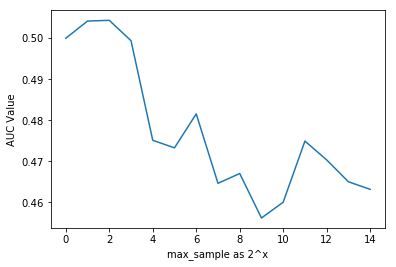

In [13]:
plt.plot(auc)
plt.xlabel("max_sample as 2^x")
plt.ylabel("AUC Value")